In [1]:
import pandas as pd

PATH_MOVIES = 'Material/IMDB5000/tmdb_5000_movies.csv'
df_movies   = pd.read_csv(PATH_MOVIES)
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [2]:
# Nominal categorical variable
df_movies['original_language'].unique()

# Ordinal categorical variable example: First grade < Second grade < Third grade

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [3]:
df_movies['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [4]:
df_movies['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [5]:
df_movies['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [6]:
lang_count         = df_movies['original_language'].value_counts().to_frame().reset_index()
lang_count.columns = ['original_language', 'total'] # Rename
lang_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

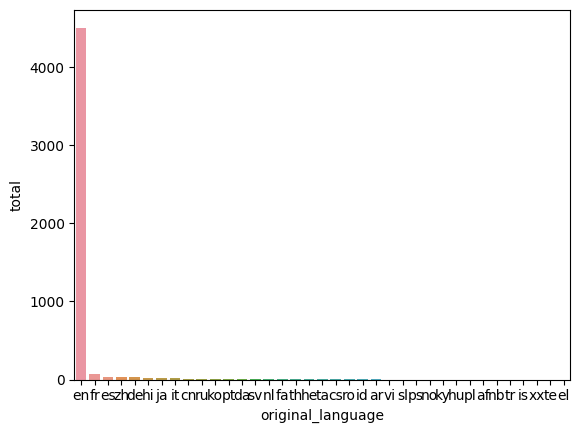

In [7]:
import seaborn as sns

sns.barplot(x='original_language', y='total', data=lang_count)

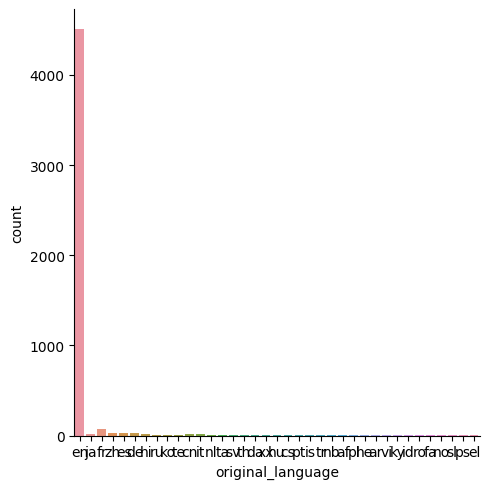

In [8]:
sns.catplot(x='original_language', kind='count', data=df_movies)

([<matplotlib.patches.Wedge at 0x20b7df7dd90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

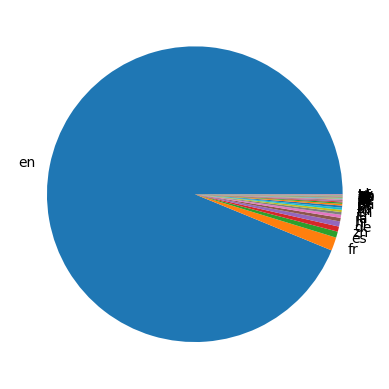

In [9]:
import matplotlib.pyplot as plt

plt.pie(lang_count['total'], labels=lang_count['original_language']) # Pie chart is not recommended

In [10]:
lang_total    = df_movies['original_language'].value_counts()
general_total = lang_total.sum()
en_total      = lang_total.loc['en']
others_total  = general_total - en_total
print(en_total, others_total) # Now it's separated by 'english' and 'others'

4505 298


In [11]:
data = {
  'language': ['en', 'others'],
  'total': [en_total, others_total]
}
data = pd.DataFrame(data)
data

,language,total
0,en,4505
1,others,298


<Axes: xlabel='language', ylabel='total'>

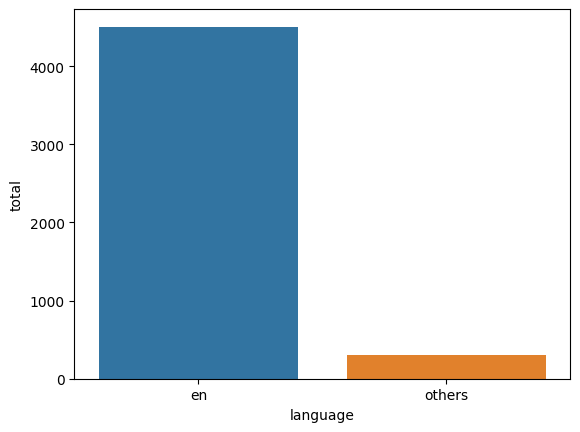

In [13]:
sns.barplot(x='language', y='total', data=data)

([<matplotlib.patches.Wedge at 0x20b7e580690>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

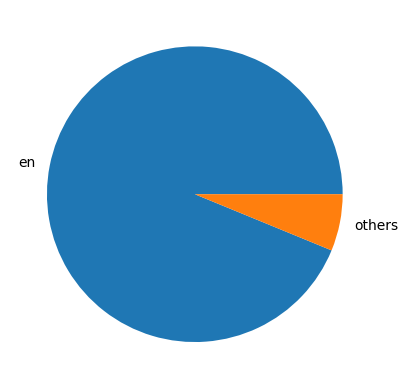

In [14]:
plt.pie(data['total'], labels = data['language']) # Not recommended

In [51]:
other_lang = df_movies.query(' original_language != "en" ').original_language.value_counts()
other_lang

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

In [42]:
not_en_lang = df_movies.query(' original_language != "en" ')

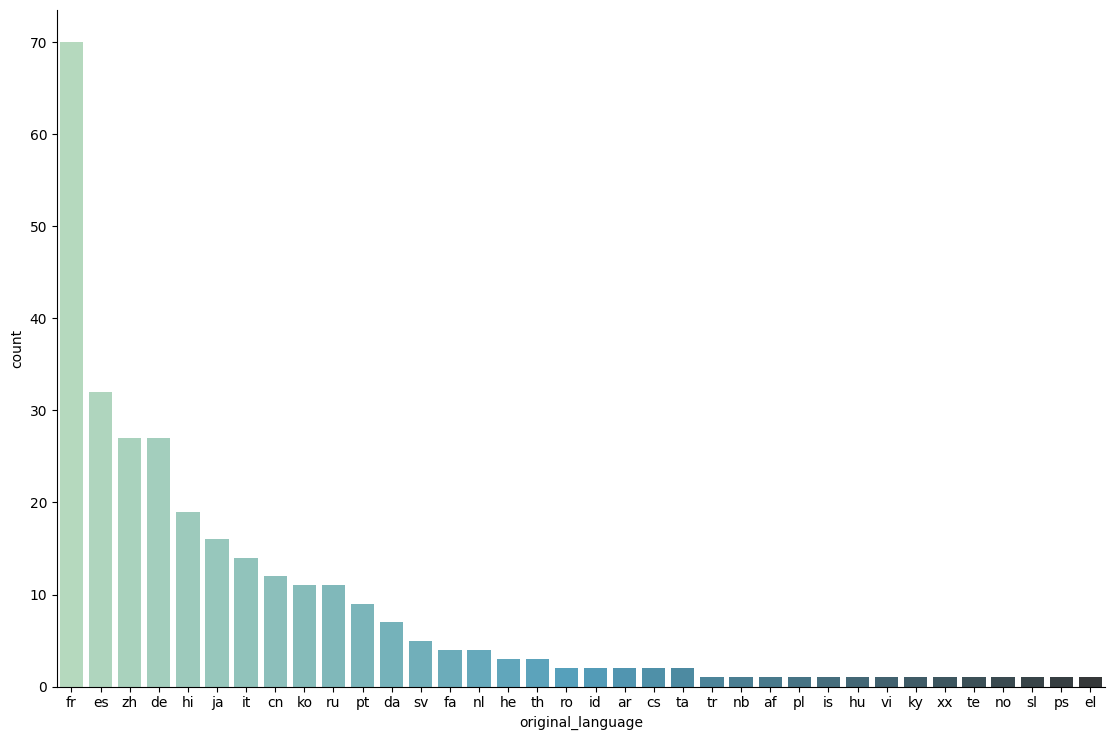

In [52]:
sns.catplot(x='original_language', kind='count', data=not_en_lang, aspect=1.5, height=7.5, order=other_lang.index, palette='GnBu_d')

In [12]:
# Finding all movies with original language 'pt'
df_movies.query('original_language ==  "pt"')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2915,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""...",NaN,206563,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 8029...",pt,Trash,"Set in Brazil, three kids who make a discovery...",14.637357,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""W...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-10-09,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,You never know what you might find,Trash,7.1,242
3417,4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.tropadeeliteofilme.com.br/,7347,"[{""id"": 100, ""name"": ""slum""}, {""id"": 796, ""nam...",pt,Tropa de Elite,"In 1997, before the visit of the pope to Rio d...",23.604936,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2007-10-12,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,On the streets of Rio only the elite survive,Elite Squad,7.8,504
3797,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,227975,"[{""id"": 74, ""name"": ""germany""}, {""id"": 237, ""n...",pt,Praia do Futuro,Donato fails in his attempt to save a drowning...,2.611364,"[{""name"": ""Cora\u00e7\u00e3o da Selva"", ""id"": ...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-05-01,0,106.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,A hero split in half.,Futuro Beach,6.4,31
3818,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,29262,"[{""id"": 1161, ""name"": ""brazil""}, {""id"": 18034,...",pt,Casa de Areia,A woman is taken along with her mother in 1910...,0.389471,[],"[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2005-05-13,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The House of Sand,6.7,9
3866,3300000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://cidadededeus.globo.com/,598,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 54...",pt,Cidade de Deus,Cidade de Deus is a shantytown that started du...,44.356711,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""V...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2002-02-05,30641770,130.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,"If you run you're dead... if you stay, you're ...",City of God,8.1,1814
3974,2900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,666,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Central do Brasil,"An emotive journey of a former school teacher,...",5.928937,"[{""name"": ""MACT Productions"", ""id"": 393}, {""na...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1998-01-16,5596708,113.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,He was looking for the father he never knew. S...,Central Station,7.6,126
4303,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,310569,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Que Horas Ela Volta?,After leaving her daughter Jessica in a small ...,9.683622,"[{""name"": ""Gullane Entretenimento S.A."", ""id"":...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2015-02-08,0,110.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The Second Mother,7.8,165
4684,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,402515,"[{""id"": 321, ""name"": ""terror""}, {""id"": 8087, ""...",pt,Solitude,After finding an old storage locker filled wit...,0.018716,"[{""name"": ""Gravitas Ventures"", ""id"": 44632}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-21,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,American Beast,0.0,0
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mi